<a href="https://colab.research.google.com/github/EmanALZahrani/computer_vision/blob/main/Task_7_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**1. Dataset Selection (15 marks):**


• Choose a computer vision dataset suitable for classification or object detection tasks. The dataset should be publicly available and appropriate for transfer learning experiments.

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
import pandas as pd


from keras import layers, models, datasets, applications
from tensorflow.keras.layers import Dropout,BatchNormalization, Dense,GlobalAveragePooling2D
import plotly.graph_objects as go
import time
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
import keras_tuner as kt


In [ ]:
X_train = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Task-7/rock-paper-scissor_split/train",
                                                      # color_mode="grayscale",
                                                            shuffle=True,
                                                            batch_size=40,
                                                            # color_mode="grayscale",
                                                            image_size= (256,256))

X_valid = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Task-7/rock-paper-scissor_split/valid",
                                                      # color_mode="grayscale",
                                                            shuffle=True,
                                                            batch_size=40,
                                                            # color_mode="grayscale",
                                                            image_size= (256,256))
X_test = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Task-7/rock-paper-scissor_split/test",
                                                      # color_mode="grayscale",
                                                            shuffle=True,
                                                            batch_size=40,
                                                            # color_mode="grayscale",
                                                            image_size= (256,256))

Found 590 files belonging to 3 classes.
Found 169 files belonging to 3 classes.
Found 82 files belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


• Ensure the dataset contains a sufficient number of images and corresponding labels for training and evaluation.

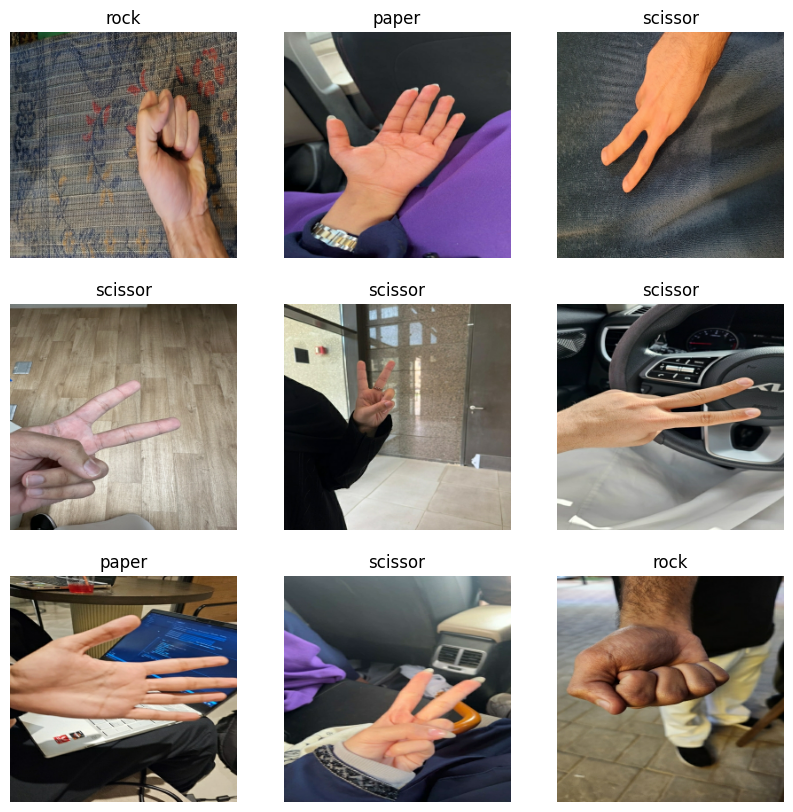

In [ ]:
class_names = X_valid.class_names

plt.figure(figsize=(10, 10))
for images, labels in X_valid.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

####**2. Transfer Learning Implementation (35 marks):**

• Preprocess the selected dataset, including data augmentation techniques such as rotation, flipping, and resizing.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(0.3),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.2),
])


In [ ]:
X_train_aug = aug_ds = X_train.map(
  lambda x, y: (data_augmentation(x, training=True), y))

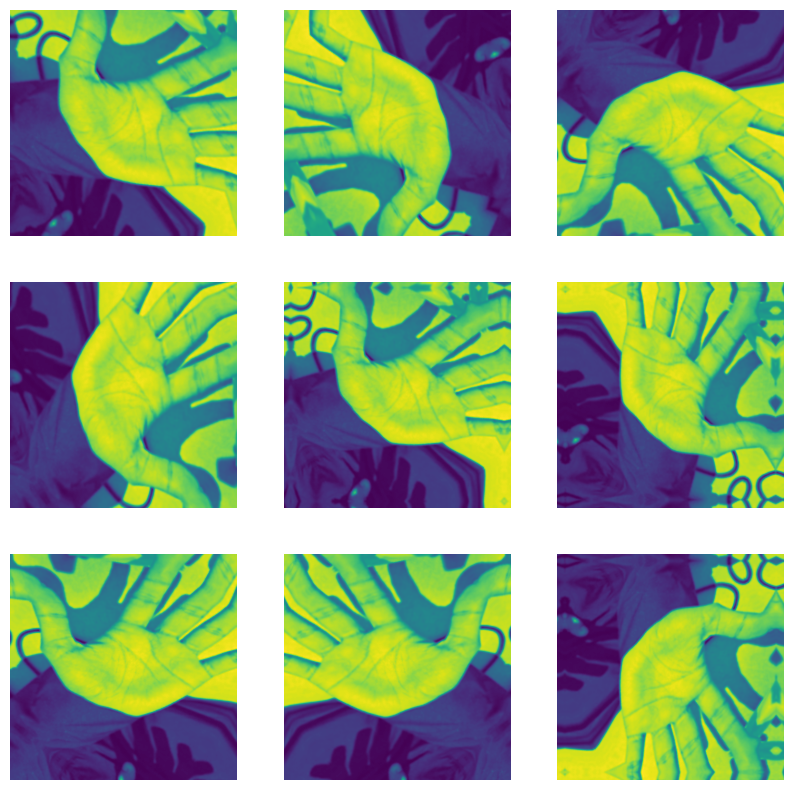

In [ ]:
for image, _ in X_train_aug.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
# def model_builder(hp):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
#         MaxPooling2D(),
#         Flatten(),
#         Dense(20, activation='softmax')
#     ])
#     model.compile(optimizer=Adam(),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

In [ ]:
# gpus=tf.config.experimental.list_physical_devices('GPU')

In [ ]:
# gpus=tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus :
#         tf.config

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
#     except RuntimeError as e:
#         print(e)
# else:
#     print("No GPUs found. Running on CPU instead.")

Physical devices cannot be modified after being initialized



• Choose a pre-trained deep learning model (e.g., VGG, ResNet, Inception) suitable for transfer learning.

• Implement transfer learning by loading the pre-trained model and fine-tuning it on the selected dataset.

• Train the transferred model on the dataset and monitor its performance during training.


**Based model**

-----------

In [ ]:
based_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.50),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    # layers.Conv2D(64, (3, 3), activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    # layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    BatchNormalization(),
    # Dropout(0.0),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),


    layers.Dense(256, activation='relu'),
    BatchNormalization(),

    # Dropout(0.20),
    layers.Dense(64, activation='relu'),
        BatchNormalization(),

    # Dropout(0.20),
    # layers.Dense(32, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),

    layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),

    layers.Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(3, activation='softmax')
])


base_learning_rate = 0.0001

based_model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

based_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Ba  (None, 127, 127, 32)      128       
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)       

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)
base_hist=based_model.fit(X_train_aug, batch_size=20, epochs=100, validation_data=X_valid,callbacks=[ early_stopping])

Epoch 1/100
15/15 [==============================] - 42s 3s/step - loss: 1.4405 - accuracy: 0.3492 - val_loss: 1.2612 - val_accuracy: 0.3254
Epoch 2/100
15/15 [==============================] - 13s 753ms/step - loss: 1.1824 - accuracy: 0.4136 - val_loss: 1.1577 - val_accuracy: 0.3728
Epoch 3/100
15/15 [==============================] - 13s 746ms/step - loss: 1.1640 - accuracy: 0.4288 - val_loss: 1.0825 - val_accuracy: 0.3787
Epoch 4/100
15/15 [==============================] - 12s 725ms/step - loss: 1.1012 - accuracy: 0.4068 - val_loss: 1.1136 - val_accuracy: 0.3195
Epoch 5/100
15/15 [==============================] - 14s 810ms/step - loss: 1.0956 - accuracy: 0.4576 - val_loss: 1.1117 - val_accuracy: 0.3254
Epoch 6/100
15/15 [==============================] - 14s 840ms/step - loss: 1.1427 - accuracy: 0.4085 - val_loss: 1.0792 - val_accuracy: 0.3728
Epoch 7/100
15/15 [==============================] - 13s 740ms/step - loss: 1.0833 - accuracy: 0.4373 - val_loss: 1.0794 - val_accuracy: 0.

In [ ]:
acc_base= base_hist.history['accuracy'][-1:][0]
val_base= base_hist.history['val_accuracy'][-1:][0]

In [ ]:
based_evaluate = based_model.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_base * 100.00, val_base * 100.00, based_evaluate * 100.00))

3/3 [==============================] - 0s 20ms/step - loss: 1.0518 - accuracy: 0.4024
VGG modle - Train Accuracy: 49.15%,  Val Accuracy: 35.50%, Test Accuracy: 40.24%


**VGG model**

pre-trained

------

In [ ]:
VGG_model = applications.VGG19(weights='imagenet',include_top= False, input_shape=(256,256,3))
VGG_model.trainable=False
model_VGG=models.Sequential( [
    VGG_model,
    layers.GlobalAveragePooling2D(),
    # layers.Flatten(),
    layers.Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.10),
    layers.Dense(8, activation='relu'),
    BatchNormalization(),
    layers.Dense(3, activation='softmax')
    ])

model_VGG.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics= ['accuracy'])

model_VGG.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 global_average_pooling2d_4  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 64)                32832     
                                                                 
 batch_normalization_24 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)               

In [ ]:
best_model = ModelCheckpoint('drive/MyDrive/best_model_Vgg19.keras', save_best_only=True)
history_VGG=model_VGG.fit(X_train_aug, batch_size=30, epochs=100, validation_data=X_valid,callbacks=[ early_stopping,best_model])

Epoch 1/100
15/15 [==============================] - 40s 2s/step - loss: 1.2433 - accuracy: 0.3576 - val_loss: 1.1101 - val_accuracy: 0.3787
Epoch 2/100
15/15 [==============================] - 17s 1s/step - loss: 1.1992 - accuracy: 0.3441 - val_loss: 1.0831 - val_accuracy: 0.3905
Epoch 3/100
15/15 [==============================] - 16s 964ms/step - loss: 1.1047 - accuracy: 0.4136 - val_loss: 1.0650 - val_accuracy: 0.4142
Epoch 4/100
15/15 [==============================] - 16s 976ms/step - loss: 1.0547 - accuracy: 0.4525 - val_loss: 1.0629 - val_accuracy: 0.4556
Epoch 5/100
15/15 [==============================] - 17s 1s/step - loss: 1.0148 - accuracy: 0.4932 - val_loss: 1.0290 - val_accuracy: 0.5266
Epoch 6/100
15/15 [==============================] - 16s 955ms/step - loss: 0.9989 - accuracy: 0.4847 - val_loss: 0.9990 - val_accuracy: 0.5385
Epoch 7/100
15/15 [==============================] - 16s 992ms/step - loss: 0.9620 - accuracy: 0.5373 - val_loss: 0.9912 - val_accuracy: 0.5148
E

In [ ]:
acc_VGG= history_VGG.history['accuracy'][-1:][0]
val_VGG= history_VGG.history['val_accuracy'][-1:][0]

In [ ]:
evaluate_VGG = model_VGG.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_VGG * 100.00, val_VGG * 100.00, evaluate_VGG * 100.00))

3/3 [==============================] - 2s 680ms/step - loss: 0.6056 - accuracy: 0.7683
VGG modle - Train Accuracy: 82.20%,  Val Accuracy: 78.70%, Test Accuracy: 76.83%


Fine-Tuning

-------------

In [ ]:
VGG_model_tuning = applications.VGG19(weights='imagenet',include_top= False, input_shape=(256,256,3))
VGG_model_tuning.trainable=True
model_VGG_tuning=models.Sequential( [
    VGG_model_tuning,
    # layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(8, activation='relu'),
    BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

model_VGG_tuning.compile(loss='sparse_categorical_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [ ]:
fine_tuning_layers = 19
print(f'Depth:{len(VGG_model_tuning.trainable_variables)}')
for layer in VGG_model_tuning.layers[:fine_tuning_layers]:
  layer.trainable = False

print(f'Number of Trainable layers: {len(model_VGG_tuning.trainable_variables)}')

model_VGG_tuning.summary()

Depth:32
Number of Trainable layers: 22
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_27 (Dense)            (None, 64)                1605696   
                                                                 
 batch_normalization_28 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
              

In [ ]:
hist_Vgg19_tuning = model_VGG_tuning.fit(X_train_aug, batch_size= 20, epochs= 100, validation_data= X_valid , callbacks = [early_stopping])

Epoch 1/100
15/15 [==============================] - 70s 3s/step - loss: 1.3768 - accuracy: 0.3271 - val_loss: 9.3896 - val_accuracy: 0.3254
Epoch 2/100
15/15 [==============================] - 22s 1s/step - loss: 1.2682 - accuracy: 0.3627 - val_loss: 2.2856 - val_accuracy: 0.3373
Epoch 3/100
15/15 [==============================] - 22s 1s/step - loss: 1.3248 - accuracy: 0.3356 - val_loss: 10.1154 - val_accuracy: 0.3195
Epoch 4/100
15/15 [==============================] - 22s 1s/step - loss: 1.2454 - accuracy: 0.3339 - val_loss: 126109.3828 - val_accuracy: 0.3314
Epoch 5/100
15/15 [==============================] - 22s 1s/step - loss: 1.2801 - accuracy: 0.3356 - val_loss: 2.3989 - val_accuracy: 0.3195
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 1.1932 - accuracy: 0.3746 - val_loss: 2.5955 - val_accuracy: 0.3314
Epoch 7/100
15/15 [==============================] - 22s 1s/step - loss: 1.1997 - accuracy: 0.3610 - val_loss: 2.5832 - val_accuracy: 0.3314


In [ ]:
acc_VGG_fine= hist_Vgg19_tuning.history['accuracy'][-1:][0]
val_VGG_fine= hist_Vgg19_tuning.history['val_accuracy'][-1:][0]

In [ ]:
evaluate_VGG_fine = model_VGG_tuning.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_VGG_fine * 100.00, val_VGG_fine * 100.00, evaluate_VGG_fine * 100.00))

3/3 [==============================] - 1s 149ms/step - loss: 2.4500 - accuracy: 0.3171
VGG modle - Train Accuracy: 36.10%,  Val Accuracy: 33.14%, Test Accuracy: 31.71%


**ResNet**

--------

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models

ResNet101_model = ResNet101(weights='imagenet', include_top=False, input_shape=(256,256,3))
ResNet101_model.trainable = False

model_ResNet101 = models.Sequential([
    ResNet101_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_ResNet101.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_ResNet101.summary()


171446536/171446536 [==============================] - 1s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 32)                65568     
                                                                 
 batch_normalization_36 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

ResNet101_model_ = ModelCheckpoint('drive/MyDrive/best_model_REsNet.keras', save_best_only=True)

history_ResNet101 = model_ResNet101.fit(X_train_aug, batch_size=30, epochs=100, validation_data=X_valid, callbacks=[early_stopping, best_model])



Epoch 1/100
15/15 [==============================] - 33s 1s/step - loss: 1.1306 - accuracy: 0.4559 - val_loss: 1.1168 - val_accuracy: 0.4556
Epoch 2/100
15/15 [==============================] - 15s 872ms/step - loss: 0.8093 - accuracy: 0.6339 - val_loss: 0.8965 - val_accuracy: 0.6095
Epoch 3/100
15/15 [==============================] - 15s 869ms/step - loss: 0.6548 - accuracy: 0.7356 - val_loss: 0.9046 - val_accuracy: 0.6391
Epoch 4/100
15/15 [==============================] - 16s 894ms/step - loss: 0.5729 - accuracy: 0.7678 - val_loss: 0.7591 - val_accuracy: 0.6686
Epoch 5/100
15/15 [==============================] - 15s 859ms/step - loss: 0.4875 - accuracy: 0.8153 - val_loss: 0.6925 - val_accuracy: 0.6746
Epoch 6/100
15/15 [==============================] - 15s 901ms/step - loss: 0.4517 - accuracy: 0.8203 - val_loss: 0.6850 - val_accuracy: 0.7396
Epoch 7/100
15/15 [==============================] - 15s 872ms/step - loss: 0.3893 - accuracy: 0.8542 - val_loss: 0.6773 - val_accuracy: 0.

In [ ]:
acc_ResNet101= history_ResNet101.history['accuracy'][-1:][0]
val_ResNet101= history_ResNet101.history['val_accuracy'][-1:][0]

NameError: name 'history_ResNet101' is not defined

In [ ]:
evaluate_RestNet101 = model_ResNet101.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_ResNet101 * 100.00, val_ResNet101 * 100.00, evaluate_RestNet101 * 100.00))

3/3 [==============================] - 2s 562ms/step - loss: 0.3830 - accuracy: 0.8293
VGG modle - Train Accuracy: 92.03%,  Val Accuracy: 79.29%, Test Accuracy: 82.93%


**Xception**

---------

In [ ]:
from tensorflow.keras.applications import Xception

Xception_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model_Xception = models.Sequential([
    Xception_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.20),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    Dense(3, activation='softmax')
])

model_Xception.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_Xception.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_56 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 16)                32784     
                                                                 
 batch_normalization_57 (Ba  (None, 16)               

In [ ]:
best_model_1 = ModelCheckpoint('drive/MyDrive/best_Xception_model_V5.keras', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
Xception_hist = model_Xception.fit(X_train_aug, batch_size=20, epochs=100, validation_data=X_valid, callbacks=[early_stopping,best_model_1])

Epoch 1/100
15/15 [==============================] - 47s 1s/step - loss: 1.2768 - accuracy: 0.4915 - val_loss: 2.8987 - val_accuracy: 0.3254
Epoch 2/100
15/15 [==============================] - 22s 1s/step - loss: 0.9895 - accuracy: 0.5746 - val_loss: 1.0962 - val_accuracy: 0.4734
Epoch 3/100
15/15 [==============================] - 21s 1s/step - loss: 0.7783 - accuracy: 0.6814 - val_loss: 1.3921 - val_accuracy: 0.4260
Epoch 4/100
15/15 [==============================] - 21s 1s/step - loss: 0.6122 - accuracy: 0.7576 - val_loss: 1.0019 - val_accuracy: 0.5444
Epoch 5/100
15/15 [==============================] - 22s 1s/step - loss: 0.5958 - accuracy: 0.8085 - val_loss: 0.7740 - val_accuracy: 0.7219
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 0.5549 - accuracy: 0.8102 - val_loss: 0.6675 - val_accuracy: 0.7692
Epoch 7/100
15/15 [==============================] - 22s 1s/step - loss: 0.4409 - accuracy: 0.8508 - val_loss: 0.6109 - val_accuracy: 0.8166
Epoch 8/100
1

In [ ]:
acc_Xception= Xception_hist.history['accuracy'][-6:][0]
val_Xception= Xception_hist.history['val_accuracy'][-6:][0]

In [ ]:
Xception_evaluate =model_Xception.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_Xception * 100.00, val_Xception * 100.00, Xception_evaluate * 100.00))

3/3 [==============================] - 1s 106ms/step - loss: 0.1720 - accuracy: 0.9512
VGG modle - Train Accuracy: 95.76%,  Val Accuracy: 95.27%, Test Accuracy: 95.12%


Xception - 2

In [ ]:
from tensorflow.keras.applications import Xception

Xception_model_2 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model_Xception_2 = models.Sequential([
    Xception_model_2,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.20),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    # Dense(16, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    # Dense(8, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    # Dense(8, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    Dense(3, activation='softmax')
])


model_Xception_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_Xception_2.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 16)                32784     
                                                       

In [ ]:
best_model_V2 = ModelCheckpoint('drive/MyDrive/best_Xception_model_V2.keras', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
Xception_hist_2 = model_Xception_2.fit(X_train_aug, batch_size=20, epochs=100, validation_data=X_valid, callbacks=[early_stopping,best_model_V2])

Epoch 1/100
15/15 [==============================] - 22s 1s/step - loss: 0.0860 - accuracy: 0.9729 - val_loss: 0.3227 - val_accuracy: 0.9112
Epoch 2/100
15/15 [==============================] - 21s 1s/step - loss: 0.1301 - accuracy: 0.9593 - val_loss: 0.3873 - val_accuracy: 0.8817
Epoch 3/100
15/15 [==============================] - 21s 1s/step - loss: 0.0934 - accuracy: 0.9729 - val_loss: 0.2120 - val_accuracy: 0.9408
Epoch 4/100
15/15 [==============================] - 22s 1s/step - loss: 0.1344 - accuracy: 0.9661 - val_loss: 0.3210 - val_accuracy: 0.9231
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.0911 - accuracy: 0.9729 - val_loss: 0.3830 - val_accuracy: 0.8639
Epoch 6/100
15/15 [==============================] - 19s 1s/step - loss: 0.1038 - accuracy: 0.9729 - val_loss: 0.2355 - val_accuracy: 0.9172
Epoch 7/100
15/15 [==============================] - 20s 1s/step - loss: 0.1001 - accuracy: 0.9746 - val_loss: 0.3314 - val_accuracy: 0.8994
Epoch 8/100
1

In [ ]:
acc_Xception= Xception_hist_2.history['accuracy'][-6:][0]
val_Xception= Xception_hist_2.history['val_accuracy'][-6:][0]

In [ ]:
Xception_evaluate =model_Xception_2.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_Xception * 100.00, val_Xception * 100.00, Xception_evaluate * 100.00))

3/3 [==============================] - 18s 468ms/step - loss: 0.3338 - accuracy: 0.8780
VGG modle - Train Accuracy: 96.44%,  Val Accuracy: 92.90%, Test Accuracy: 87.80%


Xception -V3

In [ ]:
from tensorflow.keras.applications import Xception

Xception_model_V3 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model_Xception_V3 = models.Sequential([
    Xception_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.20),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.20),
    # Dense(16, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    # Dense(8, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    # Dense(8, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.20),
    Dense(3, activation='softmax')
])


model_Xception.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_Xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_16 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                32784     
                                                                 
 batch_normalization_17 (Ba  (None, 16)               

In [ ]:
best_model = ModelCheckpoint('drive/MyDrive/best_Xception_model_V3.keras', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
Xception_hist = model_Xception.fit(X_train_aug, batch_size=20, epochs=100, validation_data=X_valid, callbacks=[early_stopping,best_model])

Epoch 1/100
15/15 [==============================] - 42s 3s/step - loss: 0.1910 - accuracy: 0.9525 - val_loss: 0.4408 - val_accuracy: 0.8698
Epoch 2/100
15/15 [==============================] - 21s 1s/step - loss: 0.2136 - accuracy: 0.9339 - val_loss: 0.8954 - val_accuracy: 0.5385
Epoch 3/100
15/15 [==============================] - 20s 1s/step - loss: 0.1752 - accuracy: 0.9508 - val_loss: 0.8718 - val_accuracy: 0.6154
Epoch 4/100
15/15 [==============================] - 22s 1s/step - loss: 0.1565 - accuracy: 0.9559 - val_loss: 0.3374 - val_accuracy: 0.9053
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.1700 - accuracy: 0.9390 - val_loss: 0.8351 - val_accuracy: 0.5089
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 0.1547 - accuracy: 0.9525 - val_loss: 1.0784 - val_accuracy: 0.6213
Epoch 7/100
15/15 [==============================] - 22s 1s/step - loss: 0.1262 - accuracy: 0.9593 - val_loss: 0.3040 - val_accuracy: 0.9231
Epoch 8/100
1

In [ ]:
acc_Xception= Xception_hist.history['accuracy'][-6:][0]
val_Xception= Xception_hist.history['val_accuracy'][-6:][0]

NameError: name 'Xception_hist' is not defined

In [ ]:
Xception_evaluate =model_Xception.evaluate(X_test)[1]
print("VGG modle - Train Accuracy: {:.2f}%,  Val Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(acc_Xception * 100.00, val_Xception * 100.00, Xception_evaluate * 100.00))

3/3 [==============================] - 1s 111ms/step - loss: 0.1387 - accuracy: 0.9756
VGG modle - Train Accuracy: 97.63%,  Val Accuracy: 93.49%, Test Accuracy: 97.56%


• Evaluate the performance of the transferred model on a separate validation set and compare it with the performance of a model trained from scratch.

####**3. Model Comparison and Evaluation (30 marks):**


• Compare the performance of the transferred model with that of a model trained from scratch using appropriate evaluation metrics (e.g., accuracy, precision, recall).


| Base model | VGG model-per | VGG-fine model| ResNet101 model |Xception|Xception V2
|--------------|-----------|--------------|-----------------|----------|-----|
| 40% |76%|31%|82.93%|95.15%| 96.81%




• Analyze the strengths and weaknesses of the transferred model compared to the model trained from scratch.

• Discuss the implications of transfer learning in computer vision tasks and its potential benefits for real-world applications.

####**4. Fine-tuning and Hyperparameter Tuning (15 marks):**

• Fine-tune the hyperparameters of the transferred model to optimize its performance further.

• Experiment with different hyperparameters such as learning rate, batch size, and optimizer
settings.

• Report on the impact of hyperparameter tuning on the performance of the transferred
model.


In [ ]:
def build_model(hp) :

  n_hidden = hp.Int('n_hidden', min_value=0, max_value=10, default=2)
  n_neurons = hp.Int('n_neurons', min_value=16, max_value=128)


  lr = hp.Float('lr', min_value=1e-4, max_value=1e-1, sampling='log')
  optim = hp.Choice('optimizer',['adam', 'sgd'])
  if optim == 'adam' :
    optim = tf.keras.optimizers.Adam(learning_rate=lr)
  else :
    optim = tf.keras.optimizers.SGD(learning_rate=lr)


  model = Sequential()
  model.add(Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3)))
  model.add( GlobalAveragePooling2D())
  for _ in range(n_hidden):
    model.add(Dense(n_neurons, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
  return model

In [ ]:
random_search = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3, overwrite=True, seed=42)
random_search.search(X_train_aug, epochs=20, validation_data=(X_valid))

Trial 2 Complete [00h 00m 19s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 38s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
5                 |7                 |n_hidden
43                |20                |n_neurons
0.086112          |0.0016812         |lr
sgd               |adam              |optimizer

Epoch 1/20


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node Equal defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-98-704a79593c7b>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 969, in sparse_categorical_matches

required broadcastable shapes
	 [[{{node Equal}}]] [Op:__inference_train_function_345902]
